### 4.10 Part Customers by Spender flag
#### 1 - importing libraries
#### 2 - Importing df
#### 3 - Analyzing  by Loyalty Flag
#### 4 - Analyzing Purshases by Income
#### 5 - Analyzing by Busiest_day
#### 6 - Analyzing number by State
#### 7 - Analyzing by n_dependants
#### 8 - Analyzing Days since prior order
#### 9 - Defining TOP products for client group
#### 10 - analyzing  ordering habits based on a customer’s region

### 1 Importing libraries and df w/o PII

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path=r'C:\Users\user\07-2023 Instacart Basket Analysis\02 Data'

### 2 Importing df

In [4]:
df=pd.read_pickle(os.path.join(path,'Prepared Data','sample_revenue.pkl'))

In [5]:
df.columns

Index(['user_id', 'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'order_id', 'eval_set', 'order_number',
       'day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest days', 'max_order', 'loyalty_flag', 'mean_price',
       'spender_flag', 'median_days_sinse_ord', 'frequent_flag'],
      dtype='object')

In [6]:
df.shape

(31156122, 30)

### 3 Disrtibution of customers by Loyalty flag

In [7]:
DF=df[['user_id','loyalty_flag']]

In [8]:
DF1=DF.drop_duplicates()

In [9]:
DF1.groupby('loyalty_flag')['user_id'].count()

loyalty_flag
Loyal customer      17902
New customer        60937
Regular customer    83794
Name: user_id, dtype: int64

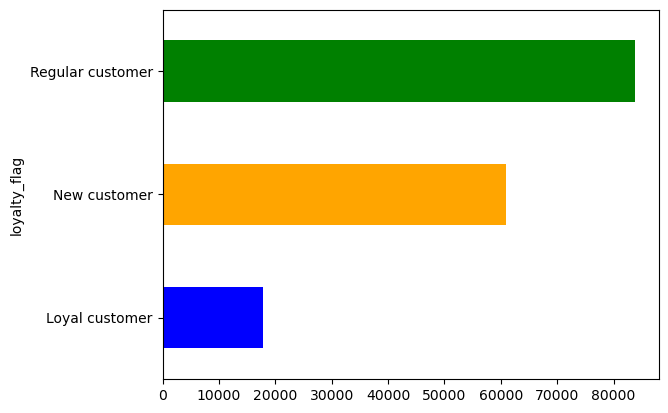

In [10]:
bar1=DF1.groupby('loyalty_flag')['user_id'].count().plot.barh(color=['blue', 'orange', 'green'])

#### - analyzing all clents by Family status and Frequent flag (by number of customers)

In [11]:
df11=df[['fam_status','frequent_flag', 'user_id']]

In [12]:
df11=df11.drop_duplicates()

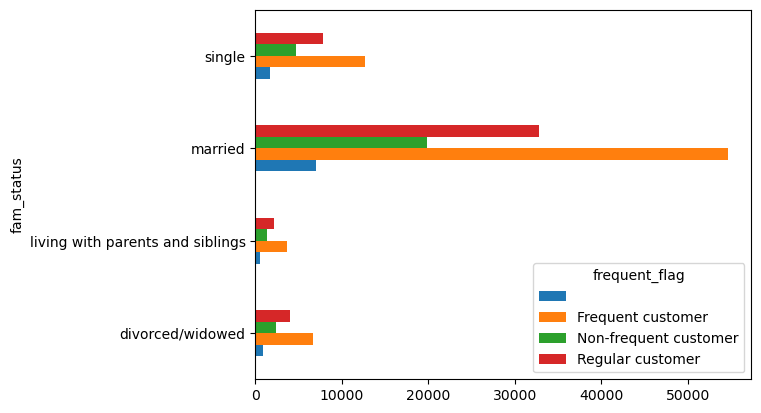

In [13]:
bar12=df11.groupby('fam_status')['frequent_flag'].value_counts().unstack().plot.barh()

In [14]:
bar12.figure.savefig(os.path.join(path, 'Prepared Data', 'Entire_FrequentDistribution.png'))

#### -saving plot

In [15]:
bar1.figure.savefig(os.path.join(path, 'Prepared Data', 'Entire_LoyalDistribution.png'))

### 3. how often customers return to IC

#### -by days since prioe order

In [16]:
DF2=df[['loyalty_flag','days_since_prior_order']]

In [17]:
DF2.groupby(['loyalty_flag'])['days_since_prior_order'].mean()

loyalty_flag
Loyal customer       5.999856
New customer        15.226447
Regular customer    11.796656
Name: days_since_prior_order, dtype: float64

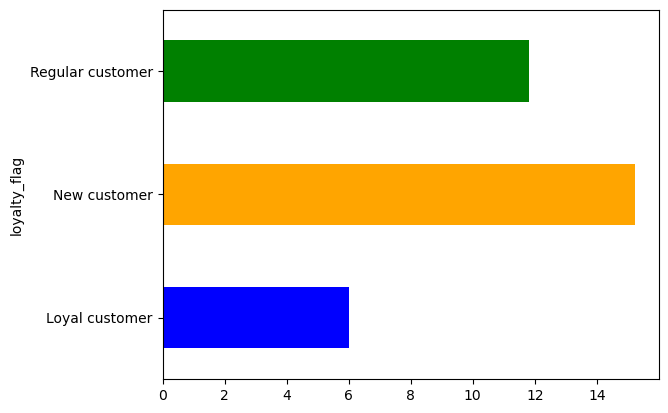

In [18]:
bar2=DF2.groupby(['loyalty_flag'])['days_since_prior_order'].mean().plot.barh(color=['blue', 'orange', 'green'])

### 4. Are there differences in ordering habits based on a customer’s loyalty status?

#### -by frequent flag

In [19]:
df11=df[['user_id','frequent_flag','loyalty_flag']]

In [20]:
df11.groupby('frequent_flag')['loyalty_flag'].value_counts()


frequent_flag          loyalty_flag    
                       Regular customer     1326400
                       New customer          244068
                       Loyal customer         10344
Frequent customer      Loyal customer      10665610
                       Regular customer     9089893
                       New customer         1251822
Non-frequent customer  New customer         1359903
                       Regular customer      866971
Regular customer       Regular customer     5098208
                       New customer         1239279
                       Loyal customer          3624
Name: loyalty_flag, dtype: int64

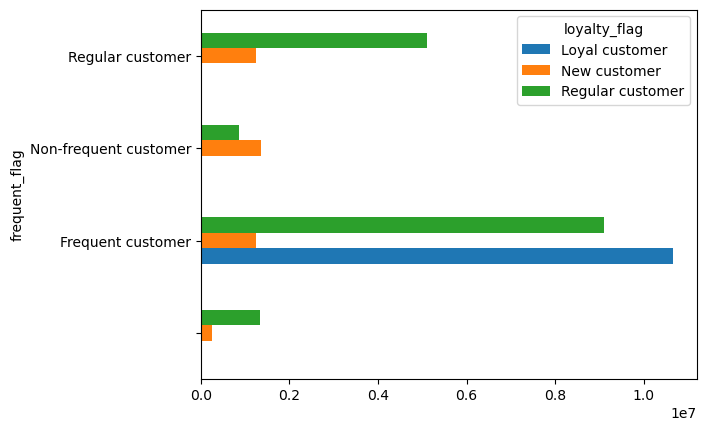

In [21]:
bar11=df11.groupby('frequent_flag')['loyalty_flag'].value_counts().unstack().plot.barh()

In [22]:
df[['user_id','Age', 'income','product_id', 'order_number','mean_price']] .describe()

,user_id,Age,income,product_id,order_number,mean_price
count,3.115612e+07,3.115612e+07,3.115612e+07,3.115612e+07,3.115612e+07,3.115612e+07
mean,1.029291e+05,4.946819e+01,9.965268e+04,2.544263e+04,1.784422e+01,1.193667e+01
std,5.947130e+04,1.848516e+01,4.313888e+04,1.417704e+04,1.763326e+01,8.001784e+01
min,1.000000e+00,1.800000e+01,2.590300e+04,0.000000e+00,1.000000e+00,1.000000e+00
25%,5.140900e+04,3.300000e+01,6.727000e+04,1.324900e+04,5.000000e+00,7.397610e+00
50%,1.025860e+05,4.900000e+01,9.674800e+04,2.510400e+04,1.200000e+01,7.829827e+00
75%,1.543890e+05,6.500000e+01,1.280820e+05,3.776600e+04,2.500000e+01,8.253762e+00
max,2.062090e+05,8.100000e+01,5.939010e+05,4.968800e+04,1.000000e+02,1.500694e+04


### 3 -Analyzing Mature Advanced Consumer by Loyalty Flag

#### --creating the subset to avoid Memory Error

In [23]:
df1=df[['user_id','fam_status','loyalty_flag']]

In [24]:
df11=df1.drop_duplicates().reset_index()

In [25]:
df11

,index,user_id,fam_status,loyalty_flag
0,0,26711,married,New customer
1,4,33890,single,Regular customer
2,19,65803,married,New customer
3,39,125935,single,Regular customer
4,78,130797,married,Regular customer
...,...,...,...,...
162628,5166243,15443,living with parents and siblings,New customer
162629,5634899,54446,married,New customer
162630,6328203,88667,married,New customer
162631,6619413,168406,married,New customer


#### -analyzing Mature  Advanced Consumer by Loyalty Flag and Family Status based on customers number

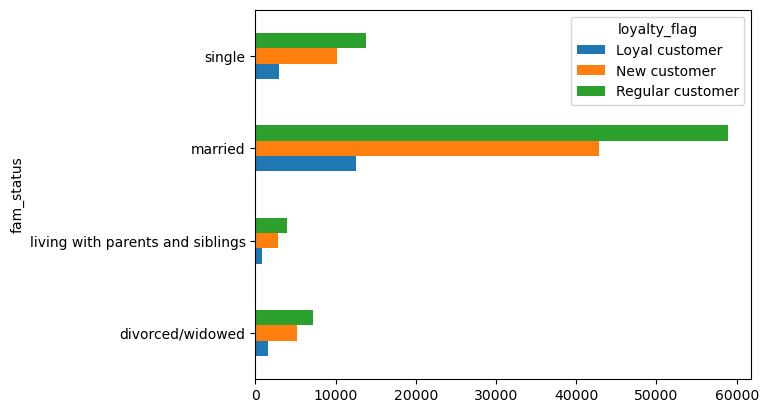

In [26]:
bar12=df11.groupby('fam_status')['loyalty_flag'].value_counts().unstack().plot.barh()

In [27]:
bar12.figure.savefig(os.path.join(path, 'Prepared Data', 'MAC_LoyaltyFlag.png'))

### -analyzing Mature  Advanced Consumer by Loyalty Flag and Family Status based on purchase number

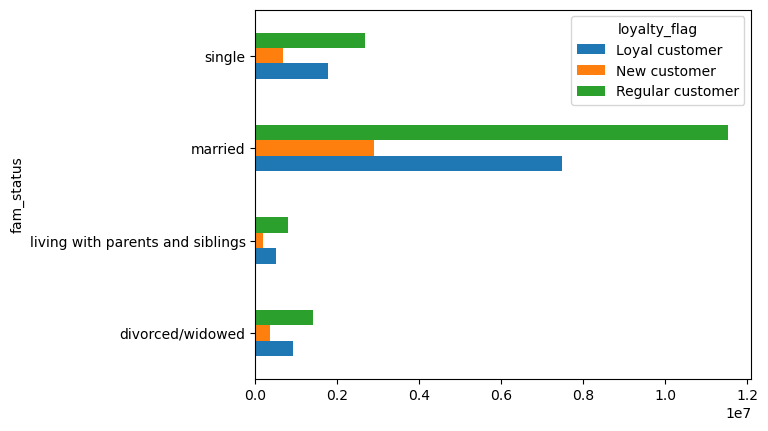

In [28]:
bar12=df1.groupby('fam_status')['loyalty_flag'].value_counts().unstack().plot.barh()

In [29]:
bar12.figure.savefig(os.path.join(path, 'Prepared Data', 'MAC_LoyaltyFlagSales.png'))

### 4 -analyzing Mature  Advanced Consumer purshases by their income

In [30]:
df2=df[['prices', 'income']]

In [31]:
df2['prices'].sum()

369873724.4000002

In [32]:
df22=df2.groupby('income').agg(mean_purshase=('prices','mean'))

In [33]:
df22

,mean_purshase
income,
25903,3.214286
25911,6.444828
25937,6.807500
25941,5.500000
25955,6.889567
...,...
584097,62.517654
590790,547.778182
591089,91.810734


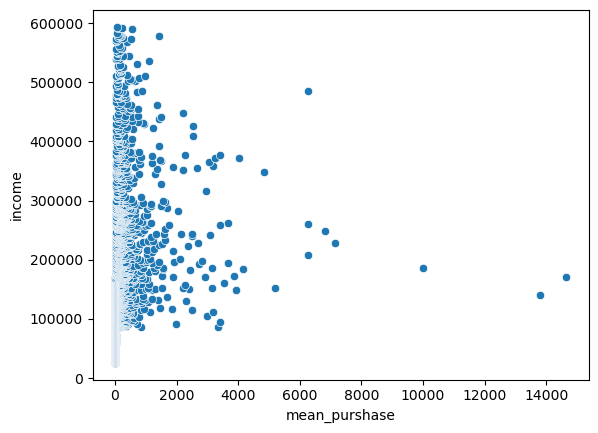

In [34]:
scat3=sns.scatterplot(x='mean_purshase', y='income', data=df22)

#### filter extrem big values

In [35]:
df22filtered=df22[df22['mean_purshase']<4000]

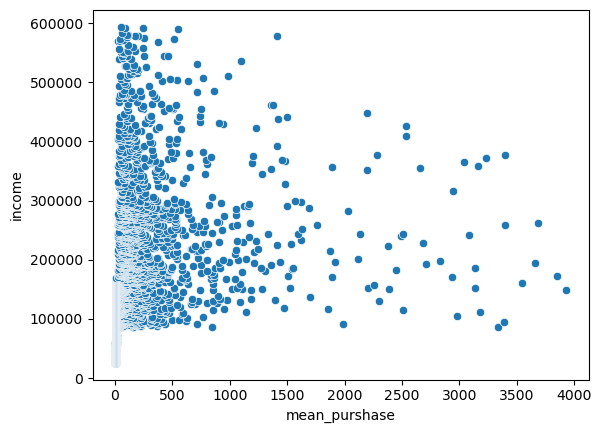

In [36]:
scat3=sns.scatterplot(x='mean_purshase', y='income', data=df22filtered)

In [37]:
scat3.figure.savefig(os.path.join(path, 'Prepared Data', 'MAC_PricesIncome.png'))

### 5 - Analyzing Mature  Advanced Consumer by Busiest_day

In [38]:
df4=df[['user_id','STATE', 'busiest_day', 'day_of_week']]

In [39]:
df4

,user_id,STATE,busiest_day,day_of_week
0,26711,Missouri,Regularly days,5
1,26711,Missouri,Busiest days,1
2,26711,Missouri,Regularly days,2
3,26711,Missouri,Regularly days,2
4,33890,New Mexico,Regularly days,6
...,...,...,...,...
6464349,135902,Missouri,Regularly days,5
6464350,135902,Missouri,Regularly days,6
6464351,135902,Missouri,Busiest days,0
6464352,135902,Missouri,Regularly days,6


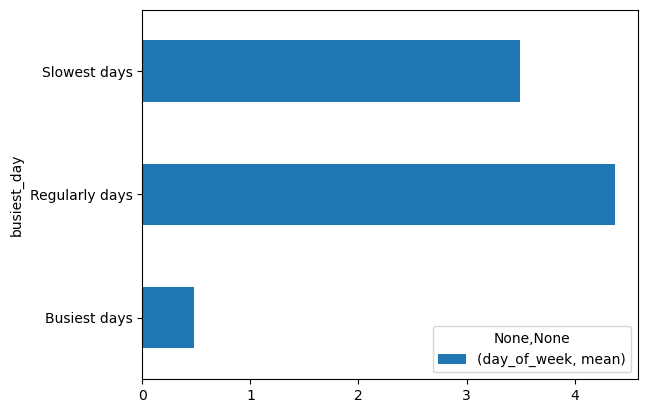

In [40]:
bar14=df4.groupby('busiest_day').agg({'day_of_week':['mean']}).plot.barh()

In [41]:
bar14.figure.savefig(os.path.join(path, 'Prepared Data', 'MAC_BusiestDayOfWeek.png'))

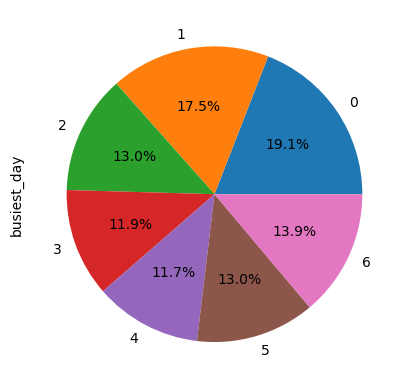

In [42]:
pie24=df4.groupby('day_of_week')['busiest_day'].count().plot(kind='pie', autopct='%0.01f%%')

In [43]:
df4.groupby('day_of_week')['busiest_day'].count()

day_of_week
0    5948348
1    5440943
2    4048187
3    3692196
4    3648286
5    4059422
6    4318740
Name: busiest_day, dtype: int64

In [44]:
pie24.figure.savefig(os.path.join(path, 'Prepared Data', 'MAC_pieBusiestDayOfWeek.png'))

#### -prefered hour of day

In [45]:
df44=df[['order_hour_of_day','user_id']]

In [46]:
df44.groupby('order_hour_of_day')['user_id'].count()

order_hour_of_day
0      209292
1      110318
2       66097
3       49110
4       51078
5       85001
6      282741
7      868390
8     1668939
9     2377634
10    2665459
11    2630504
12    2511088
13    2554778
14    2584001
15    2551999
16    2428826
17    1995584
18    1561796
19    1201887
20     936603
21     767563
22     610685
23     386749
Name: user_id, dtype: int64

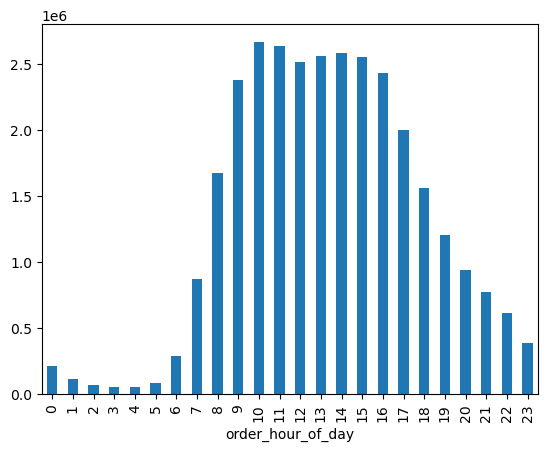

In [47]:
bar44=df44.groupby('order_hour_of_day')['user_id'].count().plot.bar()

In [48]:
bar44.figure.savefig(os.path.join(path, 'Prepared Data', 'MAC_BusiestHourOfDay.png'))

### 6 - Analyzing number of Mature  Advanced Consumers by State

In [49]:
df5=df[['user_id','STATE']]

In [50]:
DF5=df5.drop_duplicates().reset_index()

In [51]:
DF5

,index,user_id,STATE
0,0,26711,Missouri
1,4,33890,New Mexico
2,19,65803,Idaho
3,39,125935,Iowa
4,78,130797,Maryland
...,...,...,...
162628,5166243,15443,South Carolina
162629,5634899,54446,North Dakota
162630,6328203,88667,North Dakota
162631,6619413,168406,Arkansas


#### number of rows indicate total number of MAC =576

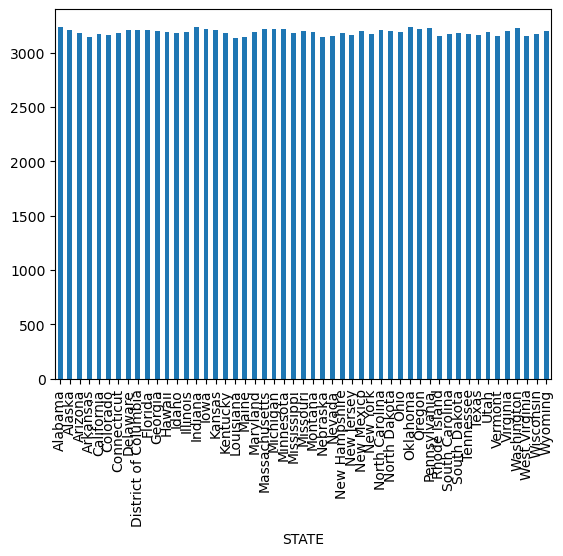

In [52]:
bar15=DF5.groupby('STATE')['user_id'].count().plot.bar()

In [53]:
DF5.groupby('STATE')['user_id'].count()

STATE
Alabama                 3233
Alaska                  3212
Arizona                 3182
Arkansas                3146
California              3169
Colorado                3162
Connecticut             3184
Delaware                3209
District of Columbia    3205
Florida                 3205
Georgia                 3197
Hawaii                  3188
Idaho                   3184
Illinois                3189
Indiana                 3239
Iowa                    3220
Kansas                  3209
Kentucky                3179
Louisiana               3137
Maine                   3145
Maryland                3193
Massachusetts           3214
Michigan                3221
Minnesota               3220
Mississippi             3178
Missouri                3197
Montana                 3194
Nebraska                3146
Nevada                  3157
New Hampshire           3177
New Jersey              3159
New Mexico              3204
New York                3171
North Carolina          3209
North Da

#### -defining 10 Top States

In [54]:
DF5.groupby('STATE')['user_id'].count().sort_values(ascending=False).head(10)

STATE
Indiana          3239
Alabama          3233
Oklahoma         3233
Pennsylvania     3231
Washington       3225
Michigan         3221
Minnesota        3220
Iowa             3220
Oregon           3214
Massachusetts    3214
Name: user_id, dtype: int64

#### -saving the plot

In [55]:
bar15.figure.savefig(os.path.join(path, 'Prepared Data', 'MAC_UsersNumberState.png'))

### 7 - Analyzing Mature  Advanced Consumer  by n_dependants

In [56]:
df6=df[['user_id', 'n_dependants']]

In [57]:
DF6=df6.drop_duplicates()

In [58]:
DF6.groupby(['n_dependants'])['user_id'].count()

n_dependants
0    40728
1    40689
2    40603
3    40613
Name: user_id, dtype: int64

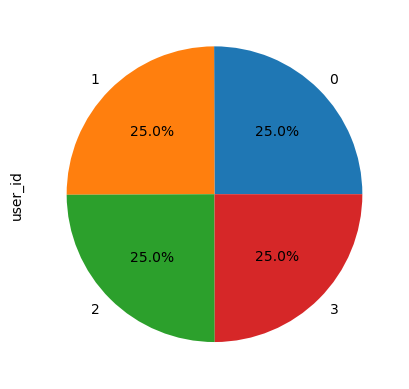

In [59]:
pie16=DF6.groupby(['n_dependants'])['user_id'].count().plot(kind='pie', autopct='%0.01f%%')

In [60]:
DF6

,user_id,n_dependants
0,26711,3
4,33890,0
19,65803,2
39,125935,0
78,130797,1
...,...,...
5166243,15443,2
5634899,54446,1
6328203,88667,3
6619413,168406,2


#### saving the plot

In [61]:
pie16.figure.savefig(os.path.join(path, 'Prepared Data', 'MAC_NDependansUsers.png'))

### 8 - Analyzing Days since prior order

In [62]:
df.groupby('days_since_prior_order')['days_since_prior_order'].count()

days_since_prior_order
0     2104035
1      936055
2     1457383
3     1867166
4     2065829
5     2106387
6     2489748
7     3433319
8     1902907
9     1196941
10     948720
11     802494
12     755376
13     828241
14     998082
15     650412
16     444867
17     368353
18     338781
19     321683
20     364323
21     424167
22     295041
23     214765
24     184561
25     171476
26     168859
27     192353
28     238901
29     165452
30    2719445
Name: days_since_prior_order, dtype: int64

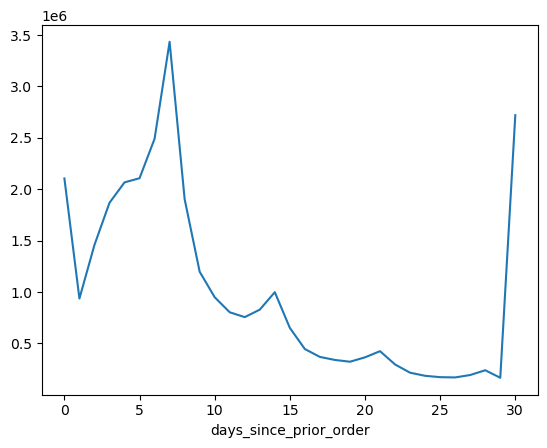

In [63]:
line17=df.groupby('days_since_prior_order')['days_since_prior_order'].count().plot(kind='line')

In [64]:
line17.figure.savefig(os.path.join(path, 'Prepared Data', 'MAC_DaysSincePriorOrder.png'))

### 9- Defining TOP products for client group


 #### creating subset

In [65]:
df18=df[['product_name','product_id','prices']]

In [66]:
df18

,product_name,product_id,prices
0,Soda,196,9.0
1,Clementines,6184,4.3
2,0% Greek Strained Yogurt,38928,12.6
3,,0,0.0
4,Organic Diced Tomatoes,890,4.9
...,...,...,...
6464349,Chicken Carbonara,32019,13.2
6464350,Wild Blueberry Muffin & Quick Bread Mix,44678,12.1
6464351,Fresh Mint Toothpaste,44801,1.5
6464352,Favorites Super Moist Butter Recipe Yellow Cak...,47115,8.6


#### identifying the most populare products counting orders rows  and selecting 10 TOP 

In [67]:
DF18=df18.groupby('product_name')['prices'].count().sort_values( ascending=False).reset_index().drop(index=3).head(10)

In [68]:
DF18

,product_name,prices
0,Banana,453164
1,Bag of Organic Bananas,366403
2,Organic Strawberries,255988
4,Organic Hass Avocado,206799
5,,191552
6,Organic Avocado,168267
7,Large Lemon,145397
8,Strawberries,136330
9,Limes,134751
10,Organic Whole Milk,133514


In [69]:
DF18=DF18.rename(columns={'prices':'count_orders'})

In [70]:
DF18=DF18.drop(index=5)

In [71]:
DF18

,product_name,count_orders
0,Banana,453164
1,Bag of Organic Bananas,366403
2,Organic Strawberries,255988
4,Organic Hass Avocado,206799
6,Organic Avocado,168267
7,Large Lemon,145397
8,Strawberries,136330
9,Limes,134751
10,Organic Whole Milk,133514


#### -creating plot

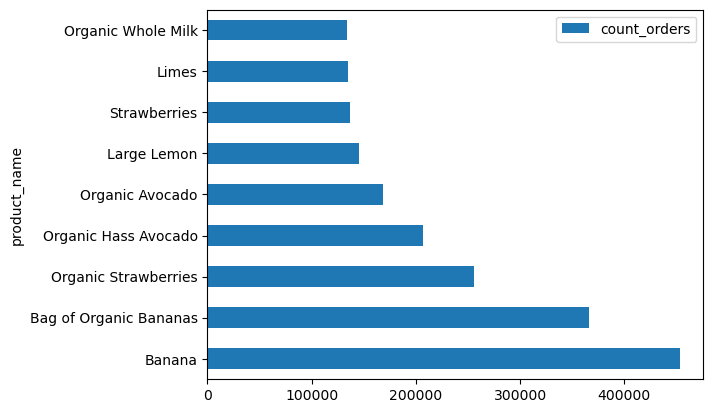

In [72]:
Bar21=DF18.plot.barh(x='product_name')

#### -saving the plot

In [73]:
Bar21.figure.savefig(os.path.join(path, 'Prepared Data', 'MAC_Products.png'))

### 10 Analyzing ordering habits based on a customer’s region

In [74]:
df18=df[['product_name','STATE','department_id','prices', ]]

In [75]:
df18

,product_name,STATE,department_id,prices
0,Soda,Missouri,7,9.0
1,Clementines,Missouri,4,4.3
2,0% Greek Strained Yogurt,Missouri,16,12.6
3,,Missouri,0,0.0
4,Organic Diced Tomatoes,New Mexico,15,4.9
...,...,...,...,...
6464349,Chicken Carbonara,Missouri,1,13.2
6464350,Wild Blueberry Muffin & Quick Bread Mix,Missouri,13,12.1
6464351,Fresh Mint Toothpaste,Missouri,11,1.5
6464352,Favorites Super Moist Butter Recipe Yellow Cak...,Missouri,13,8.6


#### - organic products

In [78]:
DF18=df18[df18["product_name"].str.contains("Organic")]

In [77]:
DF18.groupby(['STATE','product_name']).agg(sum_prices=('prices','sum'))

sum_prices
STATE   product_name                                                 
Alabama 0% Fat Free Organic Milk                                528.9
        0% Fat Organic Greek Vanilla Yogurt                     116.8
        100% Grass-Fed Organic Plain Creamline Yogurt           279.0
        100% Lactose Free Organic 2% Reduced Fat Milk            39.9
        100% Organic Chickpeas                                    3.8
...                                                               ...
Wyoming Yotoddler Organic Pear Spinach Mango Yogurt             446.9
        Yum-a-roo's Organic Toddler Snacks Banana, Man...         2.0
        Yummy Bears Organics Multi Vitamin                       12.6
        ZBar Organic Chocolate Brownie Energy Snack             788.9
        Zucchini Banana & Amaranth Organic Baby Food            165.1

[172021 rows x 1 columns]

In [79]:
DF19=DF18.groupby(['STATE']).agg(sum_prices=('prices','sum'))

In [80]:
DF19

,sum_prices
STATE,
Alabama,1515124.3
Alaska,1587435.5
Arizona,1534774.2
Arkansas,1493869.4
California,1601192.3
Colorado,1526991.9
Connecticut,1471856.4
Delaware,1467389.8
District of Columbia,1407463.8


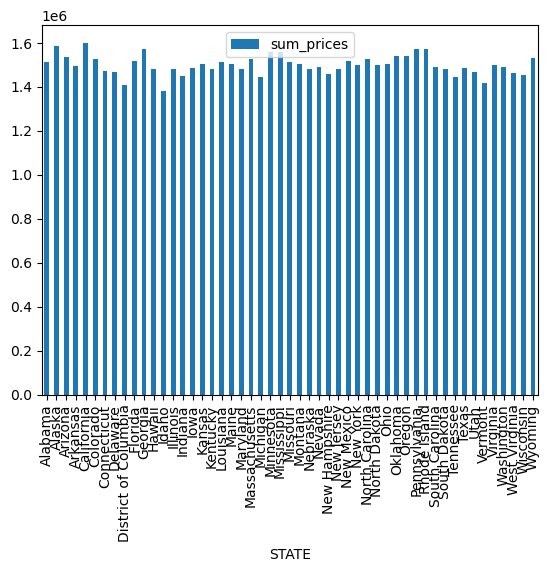

In [82]:
barDF18=DF19.plot.bar()

In [85]:
barDF18.figure.savefig(os.path.join(path, 'Prepared Data','Entire_organic.png'))

#### -Total sales volume by state to paragonate with Organic sales volume

In [86]:
df.groupby(['STATE']).agg(sum_prices=('prices','sum'))

,sum_prices
STATE,
Alabama,9187813.8
Alaska,5891666.1
Arizona,7553811.1
Arkansas,7096466.8
California,6378669.7
Colorado,8033245.9
Connecticut,6132855.8
Delaware,7887122.5
District of Columbia,6322914.7


#### --mean price by state

In [140]:
df118=df[[ 'STATE','day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'price_range_loc', 'busiest_day', 'max_order', 'loyalty_flag', 'mean_price','prices']]

In [141]:
df119=df118.groupby(['STATE']).agg(max_order=('max_order','mean'), mean_price =('mean_price','mean'), sum_sales=('prices','sum'))

In [142]:
df119

,max_order,mean_price,sum_sales
STATE,,,
Alabama,35.802938,15.044517,9187813.8
Alaska,35.257358,9.492169,5891666.1
Arizona,36.413287,12.085375,7553811.1
Arkansas,34.629981,11.709565,7096466.8
California,37.325438,10.113573,6378669.7
Colorado,35.910449,13.154910,8033245.9
Connecticut,34.823846,10.313515,6132855.8
Delaware,35.075890,12.934594,7887122.5
District of Columbia,34.996557,10.763081,6322914.7


<Axes: xlabel='STATE'>

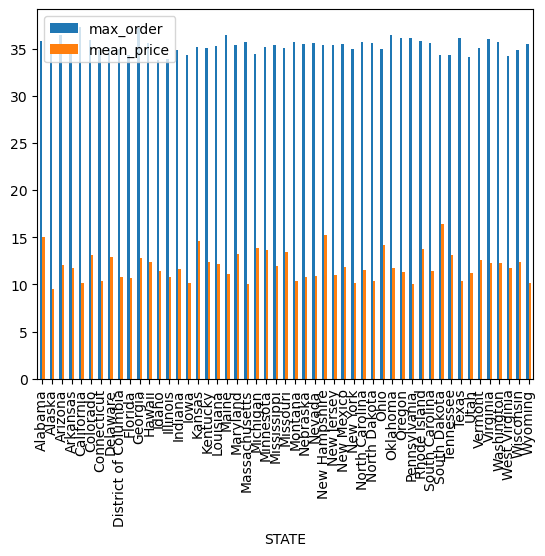

In [139]:
df119.plot.bar()